In [1]:
#This is using johns hopkins data to verify googles death counts for covid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
death=pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv')
usadeath=pd.DataFrame(death.loc[death['Country/Region'].str.contains('US')])
usadeath=usadeath.drop(columns=['Province/State','Country/Region','Lat','Long']).T
usadeath.columns=['DeathTotal']
usadeath['NewDeath']=usadeath['DeathTotal'].diff(1)
usadeath.tail(50)

,DeathTotal,NewDeath
12/13/20,299536,1379.0
12/14/20,301021,1485.0
12/15/20,304083,3062.0
12/16/20,307755,3672.0
12/17/20,311101,3346.0
12/18/20,313898,2797.0
12/19/20,316382,2484.0
12/20/20,317877,1495.0
12/21/20,319664,1787.0
12/22/20,323037,3373.0


<AxesSubplot:>

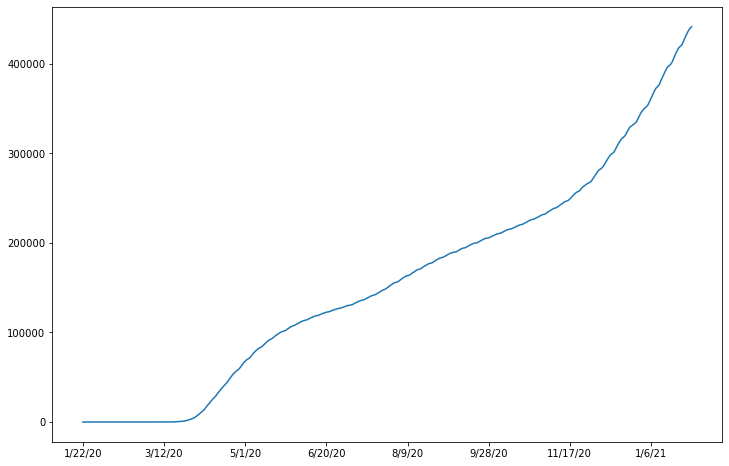

In [3]:
usadeath.DeathTotal.plot()

<AxesSubplot:>

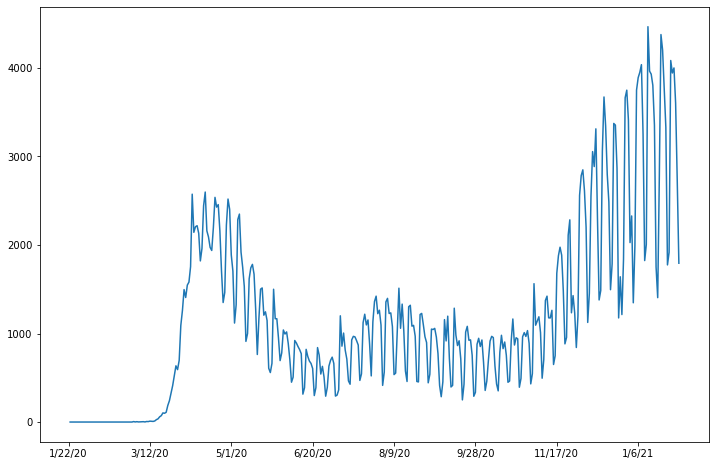

In [4]:
usadeath.NewDeath.plot()

In [5]:
usadeath[['NewDeath']].loc[usadeath.NewDeath==usadeath.NewDeath.max()]

,NewDeath
1/12/21,4466.0


In [6]:
usadeath.NewDeath.rolling(14).sum().tail(30)

1/2/21     33928.0
1/3/21     33780.0
1/4/21     33988.0
1/5/21     34365.0
1/6/21     34901.0
1/7/21     35984.0
1/8/21     38845.0
1/9/21     40455.0
1/10/21    41065.0
1/11/21    41230.0
1/12/21    42033.0
1/13/21    42248.0
1/14/21    42765.0
1/15/21    44543.0
1/16/21    45567.0
1/17/21    45971.0
1/18/21    45381.0
1/19/21    44405.0
1/20/21    44892.0
1/21/21    45145.0
1/22/21    44868.0
1/23/21    44946.0
1/24/21    44897.0
1/25/21    44808.0
1/26/21    44426.0
1/27/21    44405.0
1/28/21    44475.0
1/29/21    44274.0
1/30/21    43653.0
1/31/21    43696.0
Name: NewDeath, dtype: float64

In [7]:
#Shows 14 Day summed rate of change for the 14 day sum of deaths.
usadeath.NewDeath.rolling(14).sum().diff().rolling(14).mean().tail(60)

12/3/20     499.071429
12/4/20     501.357143
12/5/20     519.214286
12/6/20     508.785714
12/7/20     526.428571
12/8/20     505.214286
12/9/20     498.714286
12/10/20    612.642857
12/11/20    729.214286
12/12/20    807.357143
12/13/20    832.000000
12/14/20    820.285714
12/15/20    793.214286
12/16/20    791.928571
12/17/20    765.000000
12/18/20    726.142857
12/19/20    694.785714
12/20/20    703.928571
12/21/20    692.000000
12/22/20    719.357143
12/23/20    685.642857
12/24/20    566.285714
12/25/20    279.142857
12/26/20    156.357143
12/27/20    106.214286
12/28/20    111.214286
12/29/20    118.357143
12/30/20     60.428571
12/31/20     29.714286
1/1/21      -38.428571
1/2/21      -69.714286
1/3/21     -106.714286
1/4/21     -115.571429
1/5/21     -147.428571
1/6/21     -130.500000
1/7/21      -51.785714
1/8/21      305.142857
1/9/21      466.928571
1/10/21     522.285714
1/11/21     508.642857
1/12/21     523.071429
1/13/21     532.928571
1/14/21     565.071429
1/15/21    

<AxesSubplot:>

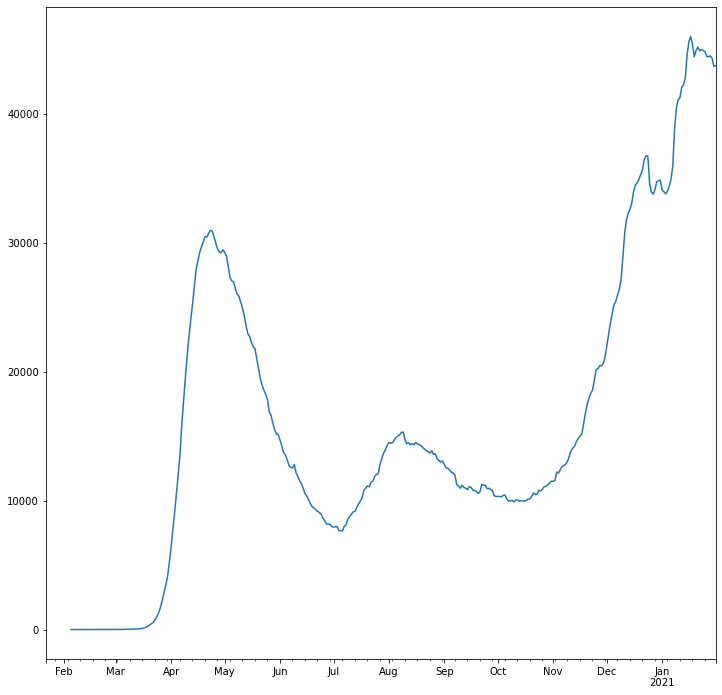

In [45]:
usadeath.NewDeath.rolling(14).sum().plot()

In [9]:
cases=pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv')
usacases=pd.DataFrame(cases.loc[cases['Country/Region'].str.contains('US')])
usacases=usacases.drop(columns=['Province/State','Country/Region','Lat','Long']).T
usacases.columns=['CaseTotal']
usacases['NewCases']=usacases['CaseTotal'].diff(1)
usacases.tail(40)

,CaseTotal,NewCases
12/23/20,18549642,228761.0
12/24/20,18742803,193161.0
12/25/20,18839532,96729.0
12/26/20,19066376,226844.0
12/27/20,19222064,155688.0
12/28/20,19396237,174173.0
12/29/20,19595117,198880.0
12/30/20,19827133,232016.0
12/31/20,20061049,233916.0
1/1/21,20213393,152344.0


<AxesSubplot:>

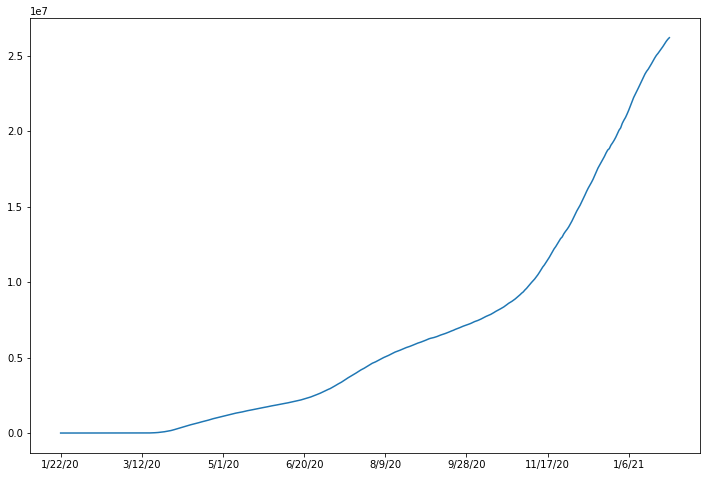

In [10]:
usacases.CaseTotal.plot()

<AxesSubplot:>

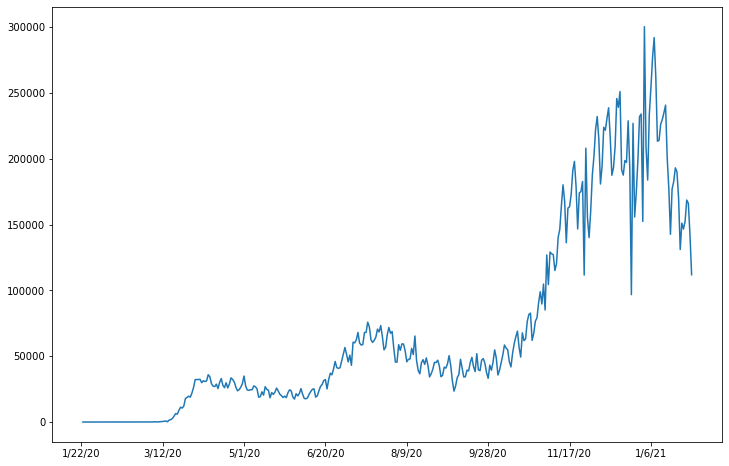

In [11]:
usacases.NewCases.plot()

<AxesSubplot:>

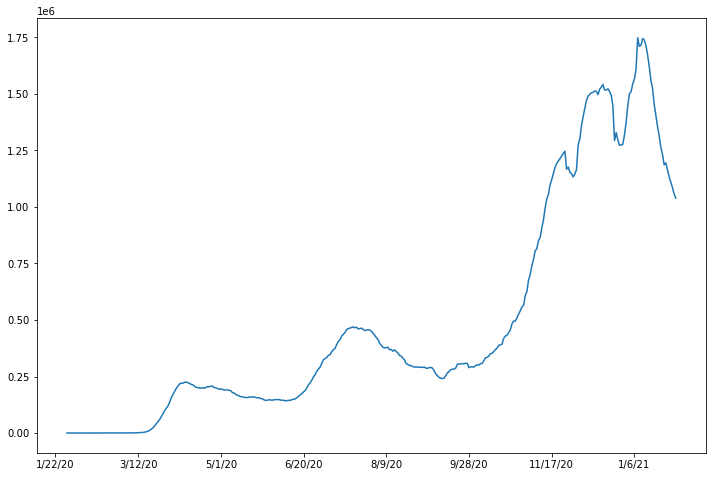

In [12]:
usacases.NewCases.rolling(7).sum().plot()

In [13]:
usacases.NewCases.rolling(14).sum().tail(30)

1/2/21     2776191.0
1/3/21     2797198.0
1/4/21     2782380.0
1/5/21     2818666.0
1/6/21     2843822.0
1/7/21     2927399.0
1/8/21     3122714.0
1/9/21     3157844.0
1/10/21    3215437.0
1/11/21    3255227.0
1/12/21    3282585.0
1/13/21    3280440.0
1/14/21    3281499.0
1/15/21    3369862.0
1/16/21    3270344.0
1/17/21    3239192.0
1/18/21    3198007.0
1/19/21    3141465.0
1/20/21    3070127.0
1/21/21    2986444.0
1/22/21    2884432.0
1/23/21    2792596.0
1/24/21    2710390.0
1/25/21    2647522.0
1/26/21    2567881.0
1/27/21    2490488.0
1/28/21    2424133.0
1/29/21    2349539.0
1/30/21    2290866.0
1/31/21    2225358.0
Name: NewCases, dtype: float64

In [14]:
#Rate of change for Cases
usacases.NewCases.rolling(14).sum().diff().rolling(14).mean().tail(60)

12/3/20     23364.785714
12/4/20     20784.357143
12/5/20     19620.285714
12/6/20     19804.214286
12/7/20     17453.285714
12/8/20     18454.142857
12/9/20     18644.714286
12/10/20    30915.500000
12/11/20    31118.642857
12/12/20    36339.000000
12/13/20    39445.071429
12/14/20    41958.500000
12/15/20    41787.214286
12/16/20    42848.857143
12/17/20    41825.000000
12/18/20    40747.642857
12/19/20    36551.642857
12/20/20    34595.285714
12/21/20    33410.142857
12/22/20    28020.785714
12/23/20    25744.071429
12/24/20    14566.571429
12/25/20     2237.428571
12/26/20    -1373.071429
12/27/20    -7024.714286
12/28/20   -10731.571429
12/29/20   -13016.285714
12/30/20   -17130.000000
12/31/20   -18698.285714
1/1/21     -27104.428571
1/2/21     -17690.642857
1/3/21     -16672.642857
1/4/21     -18018.000000
1/5/21     -13524.214286
1/6/21     -12234.571429
1/7/21      -3588.500000
1/8/21      20501.357143
1/9/21      22265.571429
1/10/21     28646.571429
1/11/21     32844.285714


### Hospitalizations

In [15]:
usahospital=pd.read_csv('https://api.covidtracking.com/v1/us/daily.csv')

In [16]:
usahospital=usahospital.hospitalizedCurrently.values.reshape(-1)[::-1]

In [17]:
usahospital=pd.DataFrame(usahospital)
usahospital.columns=['hospitalizedCurrently']

In [18]:
usahospital.tail(30)

,hospitalizedCurrently
355,123614.0
356,125562.0
357,128210.0
358,131195.0
359,132474.0
360,132370.0
361,131921.0
362,130781.0
363,129223.0
364,129793.0


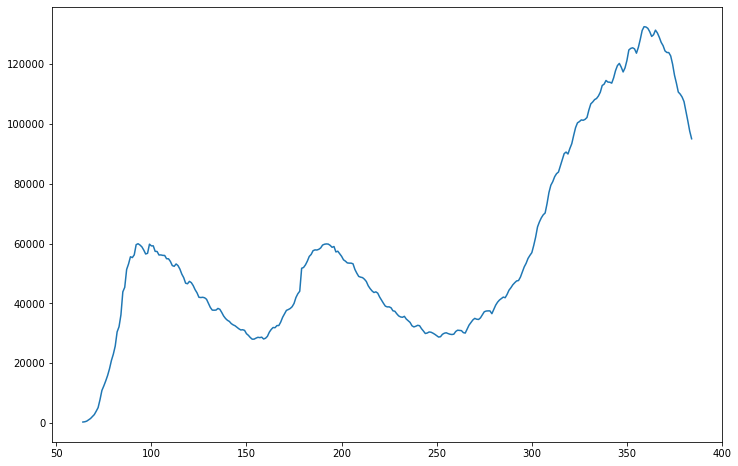

In [19]:
plt.plot(usahospital.hospitalizedCurrently)

In [20]:
usahospital.hospitalizedCurrently.diff().rolling(14).mean().tail(30)

355     692.857143
356     854.357143
357     918.000000
358     958.428571
359     929.357143
360     869.285714
361     926.642857
362     959.785714
363     750.214286
364     613.642857
365     474.285714
366     369.357143
367     251.714286
368     156.285714
369     180.357143
370     -83.928571
371    -311.571429
372    -526.785714
373    -698.142857
374    -887.214286
375   -1118.357143
376   -1226.571429
377   -1328.214286
378   -1418.357143
379   -1597.571429
380   -1639.071429
381   -1760.285714
382   -1873.714286
383   -2041.285714
384   -2098.142857
Name: hospitalizedCurrently, dtype: float64

<AxesSubplot:>

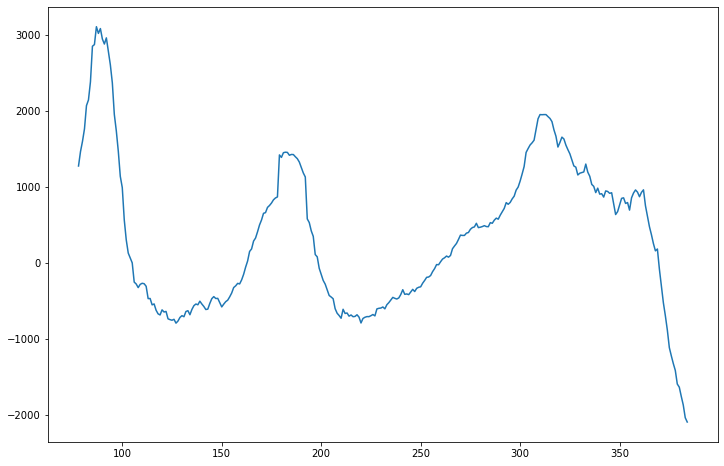

In [21]:
usahospital.hospitalizedCurrently.diff().rolling(14).mean().plot()

In [22]:
newcases=usacases[['NewCases']]
newcases['Rolling14']=newcases['NewCases'].rolling(14).sum()

In [23]:
#1st Max
newcases[newcases['Rolling14']==newcases['Rolling14'].loc['3/12/20':'5/1/20'].max()]

,NewCases,Rolling14
4/14/20,28781.0,434850.0


In [24]:
#1st min
newcases[newcases['Rolling14']==newcases['Rolling14'].loc['5/1/20':'7/1/20'].min()]

,NewCases,Rolling14
6/9/20,18382.0,288889.0


In [25]:
#2nd max
newcases[newcases['Rolling14']==newcases['Rolling14'].loc['6/20/20':'8/9/20'].max()]

,NewCases,Rolling14
7/25/20,64899.0,928282.0


In [26]:
#2nd min
newcases[newcases['Rolling14']==newcases['Rolling14'].loc['8/9/20':].min()]

,NewCases,Rolling14
9/19/20,42122.0,524165.0


In [27]:
usadeath.NewDeath.rolling(14).sum().max()

45971.0

In [28]:
newdeaths=usadeath[['NewDeath']]
newdeaths['Rolling14']=newdeaths['NewDeath'].rolling(14).sum()

In [29]:
#1st Max
newdeaths[newdeaths['Rolling14']==newdeaths['Rolling14'].loc['3/12/20':'6/20/20'].max()]

,NewDeath,Rolling14
4/23/20,2456.0,30953.0


In [30]:
#1st Min
newdeaths[newdeaths['Rolling14']==newdeaths['Rolling14'].loc['6/20/20':'8/9/20'].min()]

,NewDeath,Rolling14
7/6/20,363.0,7644.0


In [31]:
#2nd Max
newdeaths[newdeaths['Rolling14']==newdeaths['Rolling14'].loc['6/20/20':'9/1/20'].max()]

,NewDeath,Rolling14
8/9/20,536.0,15305.0


In [32]:
#2nd Min
newdeaths[newdeaths['Rolling14']==newdeaths['Rolling14'].loc['9/1/20':].min()]

,NewDeath,Rolling14
10/10/20,635.0,9896.0


For 14 Day sum

1st Max: NewCases 4/17/20 NewDeath 4/23/20

1st Min: New Cases 6/9/20 NewDeath 7/6/20

2nd Max: NewCases 7/25/20 NewDeath 8/9/20

2nd Min: NewCases 9/19/20 NewDeath 10/10/20

I think it is safe to disregard the first maximum because the virus was new and intervention was poorly tracked.  

There appears to be at least a two week lag between change in cases and change in deaths 

New Cases 6/9/20 = 288342.0 NewDeath 7/6/20 = 7554.0 Proportion = 0.026198056474603076

New Cases 7/25/20 = 930338.0  NewDeath 8/9/20 = 15276.0 Proportion = 0.016419838811270744

New Cases 9/19/20 = 521775.0  NewDeath 10/10/20 = 9927.0 Proportion = 0.019025442000862442

# MODEL USING HOSPITALIZATIONS

In [33]:
x=usahospital.tail(341).reset_index().drop(columns=['index'])
y=usadeath[['NewDeath']].tail(341).reset_index()
y.columns=['Date','NewDeath']
df=x.join(y).set_index('Date')
df.index=pd.to_datetime(df.index)
df.columns=['CurrentHospital','NewDeath']

In [34]:
df['Rolling14D']=df.NewDeath.rolling(14).sum()
df['Rolling14H']=df.CurrentHospital.rolling(14).sum()
df['pred21_25']=df['Rolling14H']*(.03)
predictions=df[['pred21_25']]
predictions.index=predictions.index.shift(periods=24,freq='D')
final=predictions.join(df.drop(['pred21_25'],axis=1),how='inner')

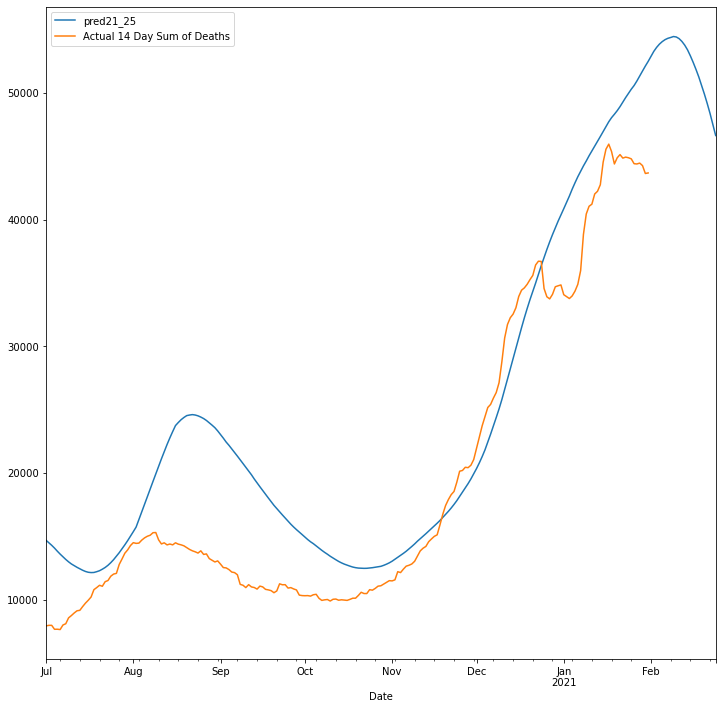

In [35]:
plt.rcParams['figure.figsize'] = [12, 12]
predictions.dropna().loc['2020-07-01':].plot(label='predicted')
final['Rolling14D'].loc['2020-07-01':].plot(label='Actual 14 Day Sum of Deaths')
plt.legend(loc='upper left')
plt.show()

In [36]:
final[['pred21_25','Rolling14D']].tail(21)

,pred21_25,Rolling14D
Date,,
2021-01-11,45431.28,41230.0
2021-01-12,45812.94,42033.0
2021-01-13,46175.94,42248.0
2021-01-14,46573.02,42765.0
2021-01-15,46967.22,44543.0
2021-01-16,47350.98,45567.0
2021-01-17,47737.98,45971.0
2021-01-18,48063.39,45381.0
2021-01-19,48329.88,44405.0


In [37]:
from datetime import date
predictions[['pred21_25']].loc[date.today():].head(21)

,pred21_25
Date,
2021-02-01,52889.64
2021-02-02,53292.75
2021-02-03,53607.84
2021-02-04,53865.57
2021-02-05,54064.77
2021-02-06,54219.90
2021-02-07,54325.62
2021-02-08,54391.26
2021-02-09,54467.01


#  MODEL USING CASES

In [38]:
'''df=usacases.join(usadeath)
df=df.drop(['CaseTotal','DeathTotal'],axis=1)
df['Rolling14D']=df.NewDeath.rolling(14).sum()
df['Rolling14C']=df.NewCases.rolling(14).sum()
df.index=pd.to_datetime(df.index)
df['pred21_18']=df['Rolling14C']*(.018)
df['pred21_17']=df['Rolling14C']*(.017)
df['pred21_16']=df['Rolling14C']*(.016)
df['pred21_15']=df['Rolling14C']*(.015)
df['pred21_14']=df['Rolling14C']*(.014)
predictions=df[['pred21_18','pred21_17','pred21_16','pred21_15','pred21_14']]
predictions.index=predictions.index.shift(periods=14,freq='D')
final=predictions.join(df.drop(['pred21_18','pred21_17','pred21_16','pred21_15','pred21_14'],axis=1),how='inner')'''

"df=usacases.join(usadeath)\ndf=df.drop(['CaseTotal','DeathTotal'],axis=1)\ndf['Rolling14D']=df.NewDeath.rolling(14).sum()\ndf['Rolling14C']=df.NewCases.rolling(14).sum()\ndf.index=pd.to_datetime(df.index)\ndf['pred21_18']=df['Rolling14C']*(.018)\ndf['pred21_17']=df['Rolling14C']*(.017)\ndf['pred21_16']=df['Rolling14C']*(.016)\ndf['pred21_15']=df['Rolling14C']*(.015)\ndf['pred21_14']=df['Rolling14C']*(.014)\npredictions=df[['pred21_18','pred21_17','pred21_16','pred21_15','pred21_14']]\npredictions.index=predictions.index.shift(periods=14,freq='D')\nfinal=predictions.join(df.drop(['pred21_18','pred21_17','pred21_16','pred21_15','pred21_14'],axis=1),how='inner')"

In [39]:
df=usacases.join(usadeath)
df=df.drop(['CaseTotal','DeathTotal'],axis=1)
df['Rolling14D']=df.NewDeath.rolling(14).sum()
df['Rolling14C']=df.NewCases.rolling(14).sum()
df.index=pd.to_datetime(df.index)
df['pred24_18']=df['Rolling14C']*(.018)
predictions=df[['pred24_18']]
predictions.index=predictions.index.shift(periods=24,freq='D')
final=predictions.join(df.drop(['pred24_18'],axis=1),how='inner')

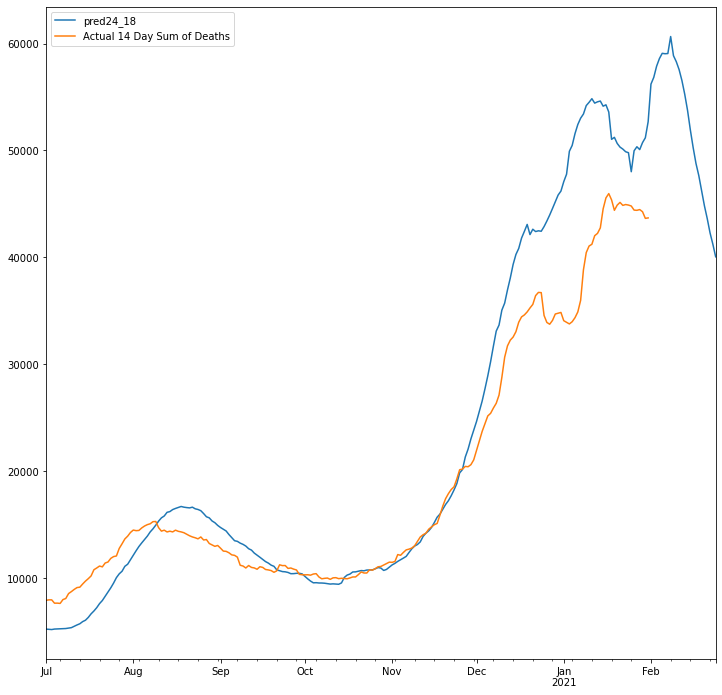

In [40]:
plt.rcParams['figure.figsize'] = [12, 12]
predictions.dropna().loc['2020-07-01':].plot(label='predicted')
final['Rolling14D'].loc['2020-07-01':].plot(label='Actual 14 Day Sum of Deaths')
plt.legend(loc='upper left')
plt.show()


In [41]:
final[['pred24_18','Rolling14D']].tail(14)

,pred24_18,Rolling14D
2021-01-18,51042.510,45381.0
2021-01-19,51230.268,44405.0
2021-01-20,50658.930,44892.0
2021-01-21,50317.326,45145.0
2021-01-22,50131.764,44868.0
2021-01-23,49884.732,44946.0
2021-01-24,49791.834,44897.0
2021-01-25,48015.432,44808.0
2021-01-26,49971.438,44426.0
2021-01-27,50349.564,44405.0


In [42]:
from datetime import date
predictions[['pred24_18']].loc[date.today():].head(24)

,pred24_18
2021-02-01,56208.852
2021-02-02,56841.192
2021-02-03,57877.866
2021-02-04,58594.086
2021-02-05,59086.530
2021-02-06,59047.920
2021-02-07,59066.982
2021-02-08,60657.516
2021-02-09,58866.192
2021-02-10,58305.456


In [43]:
x=usacases
x.index=pd.to_datetime(x.index)
y=usadeath
y.index=pd.to_datetime(y.index)
df=x.shift(periods=35,freq='D').join(y, how='left').dropna()

<AxesSubplot:>

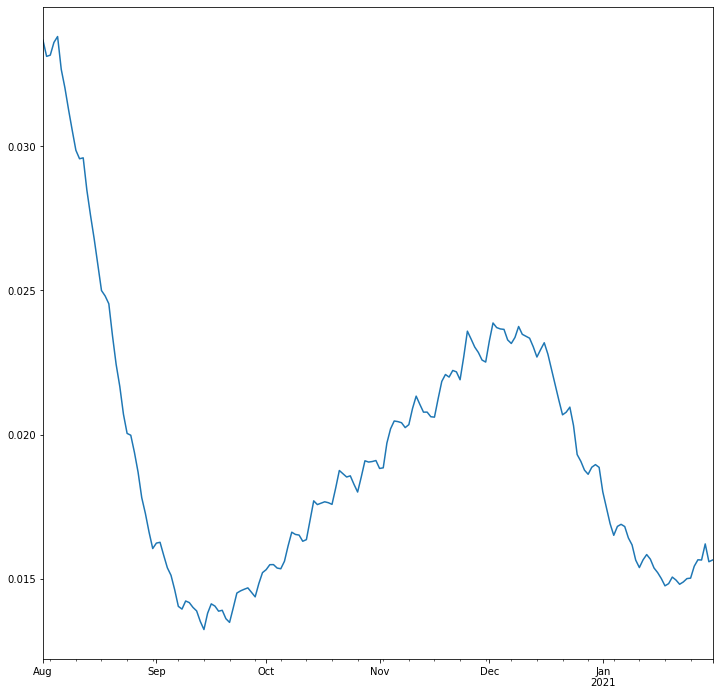

In [44]:
df['proportion']=df['NewDeath']/df['NewCases']
df.proportion.rolling(30).mean().loc['2020-08-01':].plot()